In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
G_konstanta = 6.67e-11 # SI (m^3 kg^-1 s^-2)

# parameter model sintetik
x0 = np.array([100, 300, 650, 950]) # meter
z0 = np.array([150, 200, 100, 200]) # meter
R = np.array([100, 100, 100, 100]) # meter
rho = np.array([2000, 9000, 2000, 5000]) # kg/m^3

# variabel bebas x
x = np.arange(0,1001,40)

In [3]:
# fungsi forward modellling bola homogen
def fungsi_gz(x0, z0, R, rho):
    gz = G_konstanta*((4/3)*np.pi*(R**3)*z0*rho)/(((x-x0)**2 + z0**2)**(3/2)) # 1 mGal = m/s^2
    return gz

# fungsi lingkaran
def lingkaran(x0,z0,R):
    q = np.linspace(0, 2*np.pi, 1000)
    
    xSphere = R*np.cos(q)+x0
    zSphere = R*np.sin(q)+z0
    
    return xSphere,zSphere

In [4]:
# menghitung gz total
gz = np.zeros(len(x)) # mGal (1 mGal = 10e-5 m/s^2)
for i in range(len(x0)):
    gz += fungsi_gz(x0[i], z0[i], R[i], rho[i])

misfit = 0.15*10e-6
np.random.seed(10)
noise = np.random.uniform(-0.25e-5, 0.25e-5, len(gz))
gz_obs = gz + noise

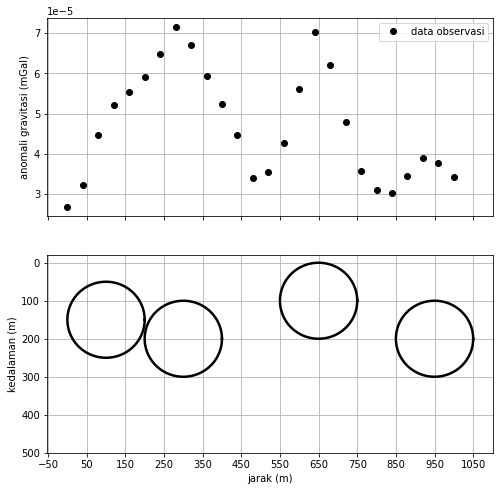

In [5]:
# plotting
fig,(ax1, ax2) = plt.subplots(2,1, sharex=True, figsize=(8,8))

# ax1
ax1.plot(x, gz_obs, 'ko', label="data observasi")
#ax1.plot(x, gz_total, 'k-', label="data tanpa noise")
ax1.set_ylabel("anomali gravitasi (mGal)")
ax1.grid()
ax1.legend()

# ax2
# plot anomali sphere
for i in range(len(x0)):
    xSphere, zSphere= lingkaran(x0[i],z0[i],R[i])
    ax2.plot(xSphere, zSphere, "k", linewidth=2.5)

ax2.set_ylim(-20,500)
ax2.grid()
ax2.set_ylabel("kedalaman (m)")
ax2.set_xlabel("jarak (m)")
ax2.set_xticks(np.arange(-50, 1101, 100))
ax2.invert_yaxis()
plt.show()

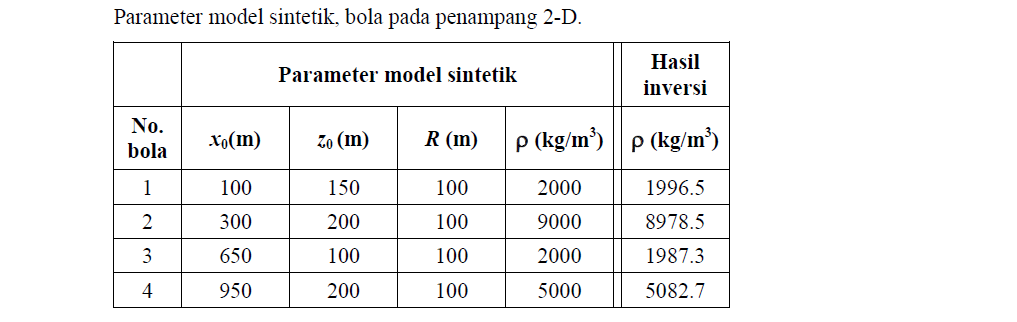

### Perhatikan gambar di bawah ini:

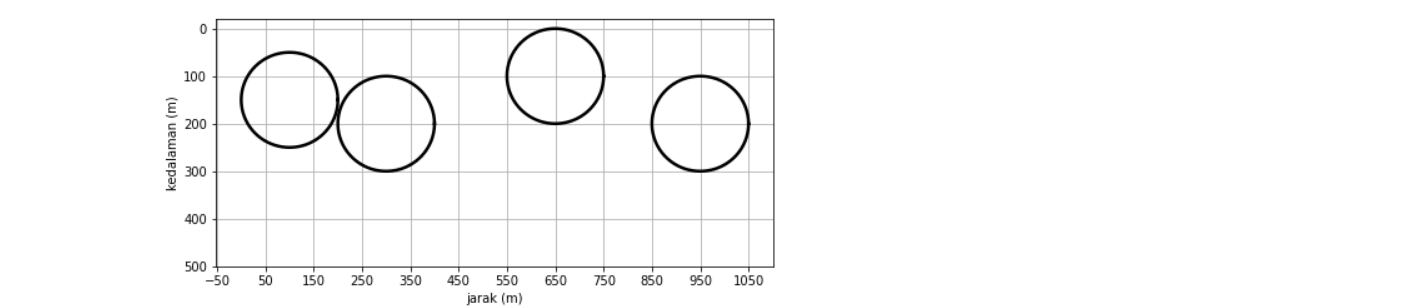

Diketahui respons 4 bola anomali gravitasi $\textbf{(gz observasi)}$ = [0.28, 0.36, 0.42, 0.51, 0.56, 0.59, 0.67, 0.7 , 0.69, 0.61, 0.52, 0.44, 0.35, 0.37, 0.42, 0.56, 0.68, 0.63, 0.48, 0.33, 0.28, 0.29, 0.36, 0.42, 0.4 , 0.37] (dalam satuan $10^{-5}$ [mGal]), 

di sepanjang lintasan $\textbf{x}$ = [   0,   40,   80,  120,  160,  200,  240,  280,  320,  360,  400, 440,  480,  520,  560,  600,  640,  680,  720,  760,  800,  840, 880,  920,  960, 1000] (dalam satuan meter).

Lakukanlah teknik inversi untuk menghasilkan densitas pada masing-masing bola, menggunakan persamaan di bawah ini:

# $g_z(x) = G \frac{\left(\frac{4}{3}\pi R^3 Z_0 \rho\right)}{((x - x_0)^2 + z_0^2)^{3/2}}$


#### $G = 6.67x10^{-11} (m^3 kg^{-1} s^{-2})$

In [6]:
# parameter model diketahui
x0 = np.array([100, 300, 650, 950]) # meter
z0 = np.array([150, 200, 100, 200]) # meter
R = np.array([100, 100, 100, 100]) # meter

# data observasi
gz_obs = np.array([0.28, 0.36, 0.42, 0.51, 0.56, 0.59, 0.67, 0.7 , 0.69, 0.61, 0.52, 
          0.44, 0.35, 0.37, 0.42, 0.56, 0.68, 0.63, 0.48, 0.33, 0.28, 0.29, 0.36, 0.42, 0.4 , 0.37])*10e-5

# variabel bebas
x = np.arange(0,1001,40)

# konstanta gravitasi universal
G_konstanta = 6.67*10e-12

In [7]:
# matriks kernel
G = np.zeros((26,4))

for i in range(4):
    for j in range(26):
        G[j,i] = G_konstanta*((4/3)*np.pi*(R[i]**3)*z0[i])/((x[j]-x0[i])**2 + (z0[i]**2))**(3/2)

In [8]:
# inversi
m_calc = np.linalg.inv((G.T).dot(G)).dot(G.T).dot(gz_obs)
m_calc

array([2005.2126616 , 9015.07485907, 1978.6228422 , 5182.94895789])

In [9]:
misfit = (gz_obs - G.dot(m_calc)).T.dot(gz_obs - G.dot(m_calc))
misfit

6.816272887229419e-11

In [10]:
RMSE = np.sqrt(np.sum((gz_obs - G.dot(m_calc))**2)/len(x))
RMSE

1.6191489796078558e-06

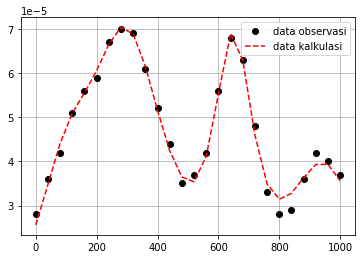

In [11]:
plt.plot(x,gz_obs, 'ko', label="data observasi")
plt.plot(x,G.dot(m_calc), 'r--', label="data kalkulasi")

plt.grid()
plt.legend()
plt.show()

In [12]:
print("densitas bola 1:",m_calc[0])
print("densitas bola 2:",m_calc[1])
print("densitas bola 3:",m_calc[2])
print("densitas bola 4:",m_calc[3])

densitas bola 1: 2005.2126615970335
densitas bola 2: 9015.074859070655
densitas bola 3: 1978.6228422009526
densitas bola 4: 5182.94895788595
